            Ex_rate
date               
1990-01-01   0.7855
1990-02-01   0.7818
1990-03-01   0.7867
1990-04-01   0.7860
1990-05-01   0.7849
Index(['Ex_rate'], dtype='object')


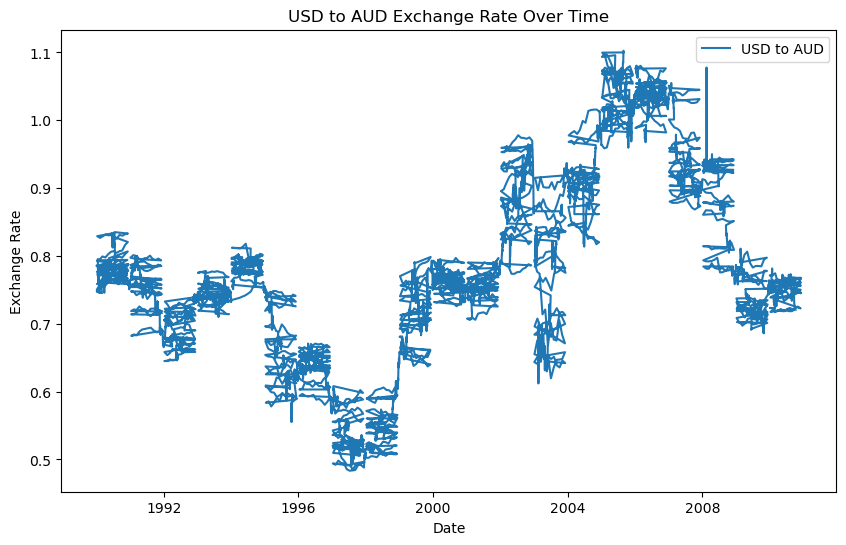

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error



df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')

# Display the first few rows of the dataset and the column names
print(df.head())
print(df.columns)

# 2. Initial Exploration: Plot the time series for USD to AUD
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.legend()
plt.show()



#  time series for USD to AUD

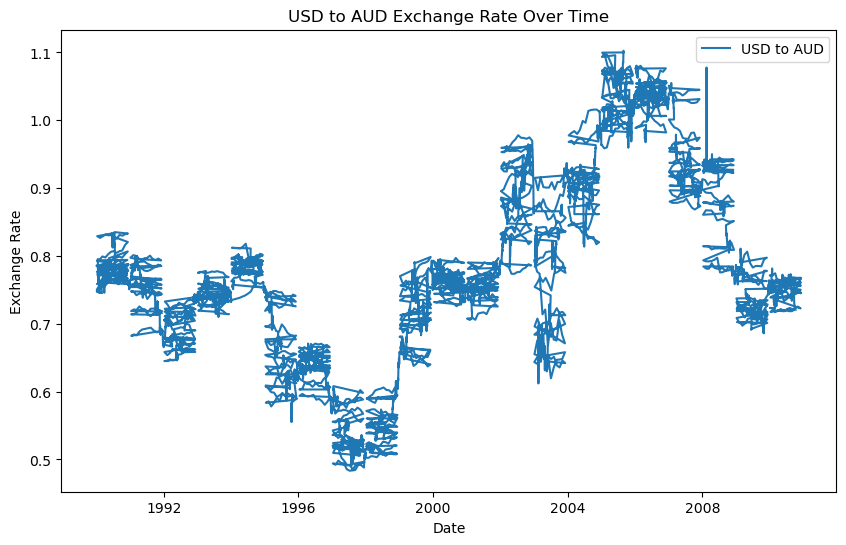

In [20]:

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.legend()
plt.show()


# 3. Data Preprocessing:

Ex_rate    0
dtype: int64
Ex_rate    0
dtype: int64


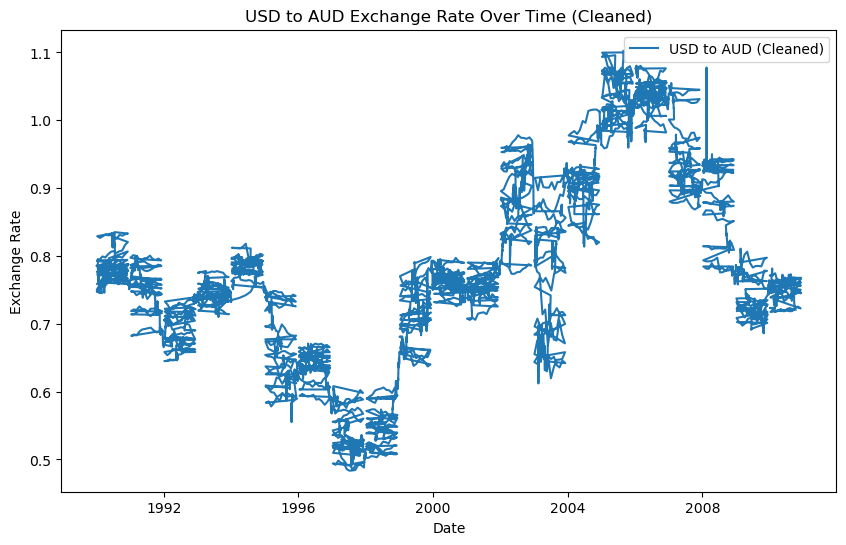

In [21]:

print(df.isnull().sum())

# Handling missing values by forward filling
df = df.ffill()

# Verifying no missing values
print(df.isnull().sum())

# time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD (Cleaned)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time (Cleaned)')
plt.legend()
plt.show()

#  Model Building - ARIMA

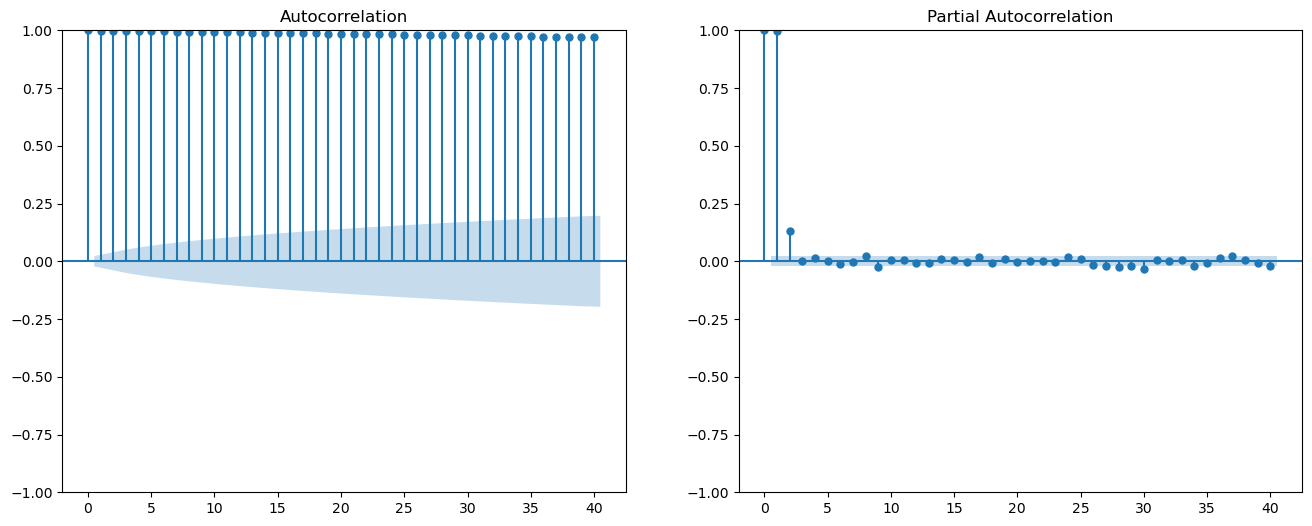

ADF Statistic: -1.6649941807381343
p-value: 0.44923273535979974
ADF Statistic after differencing: -99.39343120118629
p-value after differencing: 0.0


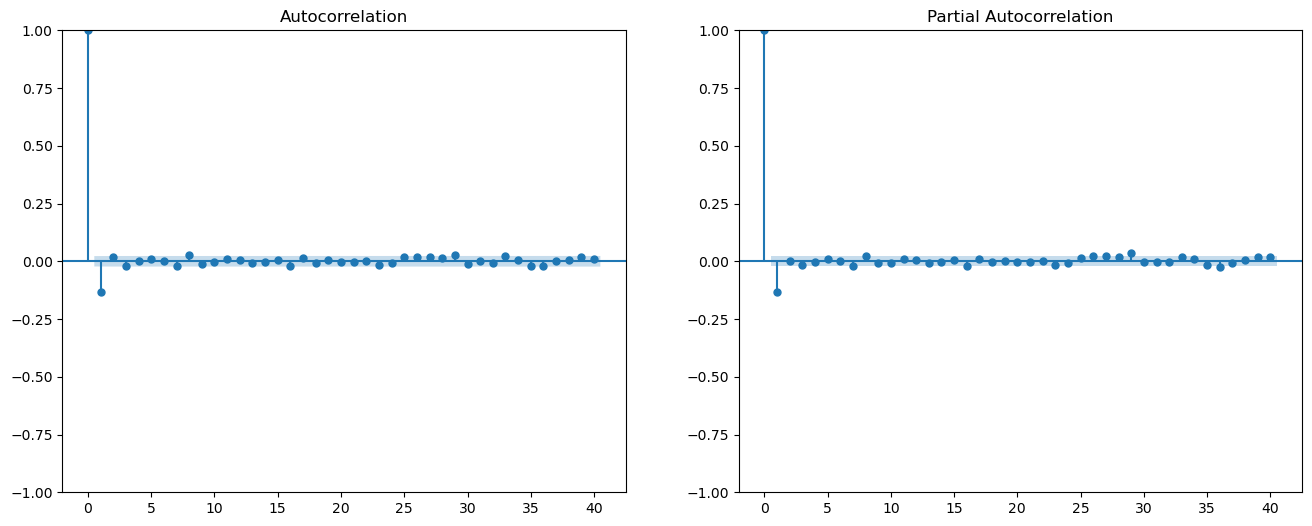

In [22]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ploting ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(df['Ex_rate'], lags=40, ax=axes[0])
plot_pacf(df['Ex_rate'], lags=40, ax=axes[1])
plt.show()

# Perform Dickey-Fuller test to check stationarity
result = adfuller(df['Ex_rate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If not stationary, difference the data
df_diff = df['Ex_rate'].diff().dropna()

# Recheck stationarity
result = adfuller(df_diff)
print('ADF Statistic after differencing:', result[0])
print('p-value after differencing:', result[1])

# Ploting ACF and PACF for differenced data
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(df_diff, lags=40, ax=axes[0])
plot_pacf(df_diff, lags=40, ax=axes[1])
plt.show()

# Fit ARIMA model

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 07 Aug 2024   AIC                         -56102.322
Time:                        22:59:23   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

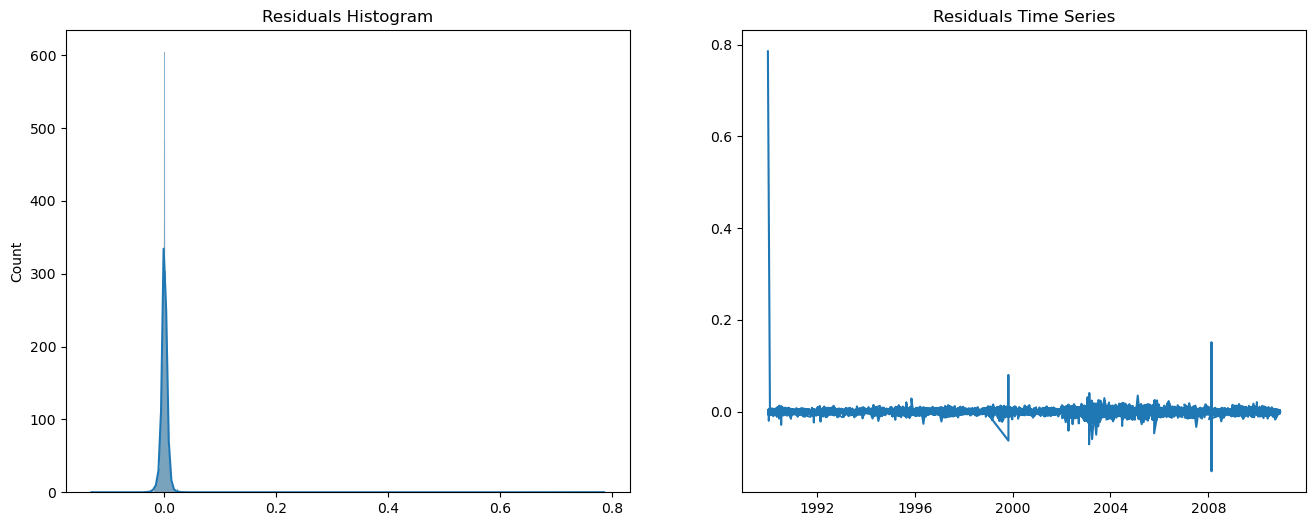

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


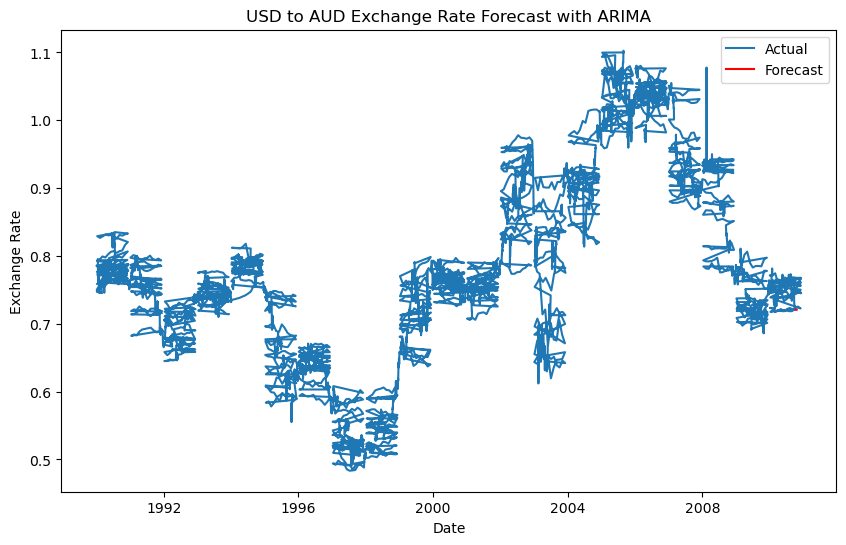

In [23]:

p = 1
d = 1
q = 1
arima_model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()
print(arima_result.summary())

#  Analyzing residuals
residuals = arima_result.resid
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Residuals Histogram')
axes[1].plot(residuals)
axes[1].set_title('Residuals Time Series')
plt.show()

#  Forecasting
forecast_steps = 12
arima_forecast = arima_result.forecast(steps=forecast_steps)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], arima_forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('USD to AUD Exchange Rate Forecast with ARIMA')
plt.legend()
plt.show()

#  Exponential Smoothing

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC: -77628.55993816568


C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


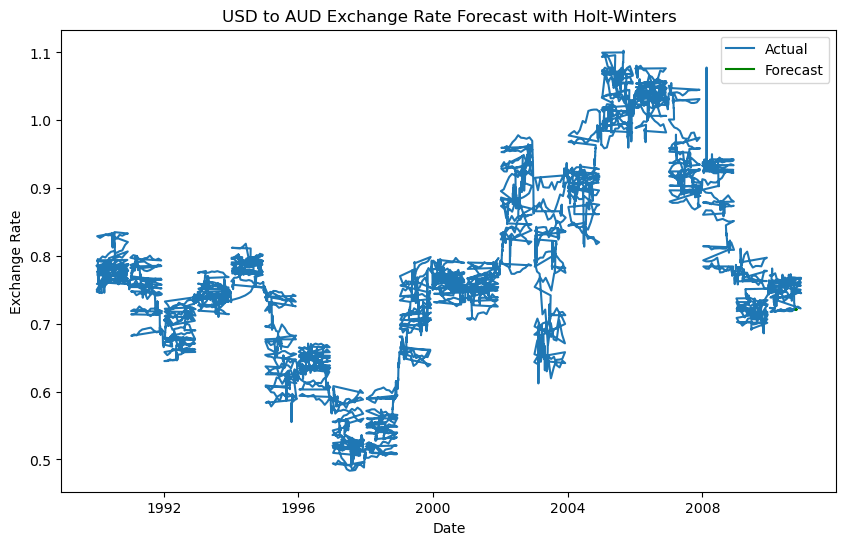

ARIMA - MAE: 0.0016644924340379526, RMSE: 0.002000358073451703, MAPE: nan%
Holt-Winters - MAE: 0.0015781974314659404, RMSE: 0.001871752270401754, MAPE: nan%
          Model       MAE      RMSE  MAPE
0         ARIMA  0.001664  0.002000   NaN
1  Holt-Winters  0.001578  0.001872   NaN


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10192\2103533072.py:23: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10192\2103533072.py:23: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10192\2103533072.py:23: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10192\2103533072.py:23: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((a

In [24]:
# Holt-Winters Exponential Smoothing
hw_model = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=12).fit()

# Using AIC for parameter tuning
print('AIC:', hw_model.aic)

# Model Fitting and Forecasting
hw_forecast = hw_model.forecast(steps=forecast_steps)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], hw_forecast, label='Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('USD to AUD Exchange Rate Forecast with Holt-Winters')
plt.legend()
plt.show()

# Evaluation and Comparison

def compute_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

# Out-of-sample actual values
actual = df['Ex_rate'][-forecast_steps:]

# ARIMA metrics
arima_mae, arima_rmse, arima_mape = compute_metrics(actual, arima_forecast)
print(f'ARIMA - MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}%')

# Holt-Winters metrics
hw_mae, hw_rmse, hw_mape = compute_metrics(actual, hw_forecast)
print(f'Holt-Winters - MAE: {hw_mae}, RMSE: {hw_rmse}, MAPE: {hw_mape}%')

#  Model Comparison
metrics_df = pd.DataFrame({
    'Model': ['ARIMA', 'Holt-Winters'],
    'MAE': [arima_mae, hw_mae],
    'RMSE': [arima_rmse, hw_rmse],
    'MAPE': [arima_mape, hw_mape]
})
print(metrics_df)

